In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import numpy as np
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
pd.set_option('display.max_columns', None) # display all columns

In [2]:
data = pd.read_csv('/Users/JAVIER/Ironhack/project-fifa-moneyball/fifa21_male2.csv')

In [3]:
data.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,€625K,€7K,€0,2008 ~ 2016,313,75,50,59,71,58.00,338,73,65.00,60,69,71,347,68,74,68.00,69,68.00,347,74,68.00,69,68,68,320,72,69.00,63.00,66.00,50,NaN,208,70,69,69.00,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,€600K,€7K,€1.1M,2014 ~ 2019,337,68,64,61,76,68.00,369,69,79.00,79,71,71,305,56,50,62.00,65,72.00,324,75,54.00,64,60,71,362,71,71.00,72.00,73.00,75,79.00,153,70,43,40.00,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,€1.1M,€15K,€0,2016 ~ 2020,337,80,64,41,77,75.00,387,79,84.00,77,69,78,295,48,42,71.00,59,75.00,284,72,58.00,29,56,69,317,69,39.00,69.00,74.00,66,NaN,99,35,34,30.00,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,€0,€0,€0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.00,72.00,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,€5.5M,€12K,€7.2M,2018 ~ 2021,367,75,69,54,90,79.00,408,85,80.00,70,83,90,346,61,56,79.00,75,75.00,297,67,40.00,58,62,70,370,58,70.00,78.00,93.00,71,89.00,181,68,57,56.00,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


# Introduction

Our football team has been acquired by a group of investors that are willing to come up with the necessary funds to set up a high-quality squad that will compete in the Spanish league. The coach wants to play with a 3-4-3 system and wants a team able to play a few seasons at least, so he doesn't want to sign players older than 31. 

Our job as data analysts is to find the best eleven players for the team, complying with the given budget and the age limit.

To do so, we will follow the next action plan:

    1. Cleaning data
    2. Finding the best players
    3. Comparison between our team vs the rest of Spanish teams
    

# 1. Cleaning data

All changes will be made on a copy of the original dataframe

In [4]:
fifa = data.copy()

After looking at the columns of our dataset, we will look at the null values and value types in order to get a more precise idea of the data we are going to work with.

In [5]:
with pd.option_context('display.max_rows', None,):
   print(fifa.isna().sum())

ID                      0
Name                    0
Age                     0
OVA                     0
Nationality             0
Club                   23
BOV                     0
BP                      0
Position              413
Player Photo            0
Club Logo              23
Flag Photo              0
POT                     0
Team & Contract         0
Height                  0
Weight                  0
foot                    0
Growth                  0
Joined                 58
Loan Date End       16215
Value                   0
Wage                    0
Release Clause          0
Contract                0
Attacking               0
Crossing                0
Finishing               0
Heading Accuracy        0
Short Passing           0
Volleys                58
Skill                   0
Dribbling               0
Curve                  58
FK Accuracy             0
Long Passing            0
Ball Control            0
Movement                0
Acceleration            0
Sprint Speed

In [6]:
with pd.option_context('display.max_rows', None,):
   print(fifa.dtypes)

ID                    int64
Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
BOV                   int64
BP                   object
Position             object
Player Photo         object
Club Logo            object
Flag Photo           object
POT                   int64
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                object
Wage                 object
Release Clause       object
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control        

We will define a function to convert the K€/M€ format into an integer, and apply it to the columns Value, Wage and Release Clause.

In [7]:
def currency_to_int(currency_str):
    try:
        currency_str = currency_str.replace('€', '').replace(',', '').replace('M', 'e6').replace('K', 'e3')
        return int(float(currency_str))
    except:
        return None

In [8]:
columns_to_convert = ['Value', 'Wage', 'Release Clause']
for col in columns_to_convert:
    fifa[col] = fifa[col].apply(currency_to_int)

In [9]:
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,Flag Photo,POT,Team & Contract,Height,Weight,foot,Growth,Joined,Loan Date End,Value,Wage,Release Clause,Contract,Attacking,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Skill,Dribbling,Curve,FK Accuracy,Long Passing,Ball Control,Movement,Acceleration,Sprint Speed,Agility,Reactions,Balance,Power,Shot Power,Jumping,Stamina,Strength,Long Shots,Mentality,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Defending,Marking,Standing Tackle,Sliding Tackle,Goalkeeping,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes,Total Stats,Base Stats,W/F,SM,A/W,D/W,IR,PAC,SHO,PAS,DRI,DEF,PHY,Hits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,https://cdn.sofifa.com/flags/it.png,69,Udinese 2008 ~ 2016,"6'0""",181lbs,Left,0,"Jul 1, 2008",NaN,625000,7000,0,2008 ~ 2016,313,75,50,59,71,58.00,338,73,65.00,60,69,71,347,68,74,68.00,69,68.00,347,74,68.00,69,68,68,320,72,69.00,63.00,66.00,50,NaN,208,70,69,69.00,56,14,5,15,10,12,1929,408,3 ★,2★,Medium,High,2 ★,71,59,70,71,68,69,4,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,https://cdn.sofifa.com/flags/es.png,71,KAS Eupen 2014 ~ 2019,"5'10""",143lbs,Right,0,"Jul 19, 2014",NaN,600000,7000,1100000,2014 ~ 2019,337,68,64,61,76,68.00,369,69,79.00,79,71,71,305,56,50,62.00,65,72.00,324,75,54.00,64,60,71,362,71,71.00,72.00,73.00,75,79.00,153,70,43,40.00,56,9,12,13,11,11,1906,385,4 ★,3★,Medium,Medium,1 ★,53,69,73,69,58,63,4,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,https://cdn.sofifa.com/flags/gb-eng.png,71,Coventry City 2016 ~ 2020,"5'9""",161lbs,Right,0,"Jan 7, 2016",NaN,1100000,15000,0,2016 ~ 2020,337,80,64,41,77,75.00,387,79,84.00,77,69,78,295,48,42,71.00,59,75.00,284,72,58.00,29,56,69,317,69,39.00,69.00,74.00,66,NaN,99,35,34,30.00,51,9,6,13,16,7,1770,354,4 ★,4★,Medium,Low,2 ★,45,68,76,77,36,52,11,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,https://cdn.sofifa.com/flags/tt.png,82,Sunderland 2009,"5'11""",165lbs,Right,14,NaN,NaN,0,0,0,2009,264,54,70,60,80,NaN,255,68,NaN,46,64,77,176,59,62,NaN,55,NaN,239,63,NaN,51,66,59,271,59,70.00,72.00,NaN,70,NaN,75,34,41,NaN,68,5,21,64,21,21,1348,369,3 ★,1★,NaN,NaN,1 ★,61,66,66,69,47,60,3,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,https://cdn.sofifa.com/flags/es.png,81,Vissel Kobe 2018 ~ 2021,"5'7""",150lbs,Right,0,"Jul 16, 2018",NaN,5500000,12000,7200000,2018 ~ 2021,367,75,69,54,90,79.00,408,85,80.00,70,83,90,346,61,56,79.00,75,75.00,297,67,40.00,58,62,70,370,58,70.00,78.00,93.00,71,89.00,181,68,57,56.00,45,6,13,6,13,7,2014,420,4 ★,4★,High,Medium,4 ★,58,70,85,85,63,59,149,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [10]:
with pd.option_context('display.max_rows', None,):
   print(fifa.dtypes)

ID                    int64
Name                 object
Age                   int64
OVA                   int64
Nationality          object
Club                 object
BOV                   int64
BP                   object
Position             object
Player Photo         object
Club Logo            object
Flag Photo           object
POT                   int64
Team & Contract      object
Height               object
Weight               object
foot                 object
Growth                int64
Joined               object
Loan Date End        object
Value                 int64
Wage                  int64
Release Clause        int64
Contract             object
Attacking             int64
Crossing              int64
Finishing             int64
Heading Accuracy      int64
Short Passing         int64
Volleys             float64
Skill                 int64
Dribbling             int64
Curve               float64
FK Accuracy           int64
Long Passing          int64
Ball Control        

In order to select the best player for each position, we will look at the highest rating for that position if it is within the limits of our budget. That is, the best Goalkeeper will be the player with the highest value in the GK column, and so on.

Therefore, we can remove the skill columns not referring to a specific position.

In [11]:
list(fifa.columns)

['ID',
 'Name',
 'Age',
 'OVA',
 'Nationality',
 'Club',
 'BOV',
 'BP',
 'Position',
 'Player Photo',
 'Club Logo',
 'Flag Photo',
 'POT',
 'Team & Contract',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Joined',
 'Loan Date End',
 'Value',
 'Wage',
 'Release Clause',
 'Contract',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'PAC',
 'SHO',
 'PAS',
 'DRI',
 'DEF',
 'PHY',
 

In [12]:
columns_to_be_removed = ['Position',
 'Club Logo',
 'Flag Photo',
 'Height',
 'Weight',
 'foot',
 'Growth',
 'Loan Date End',
 'Attacking',
 'Crossing',
 'Finishing',
 'Heading Accuracy',
 'Short Passing',
 'Volleys',
 'Skill',
 'Dribbling',
 'Curve',
 'FK Accuracy',
 'Long Passing',
 'Ball Control',
 'Movement',
 'Acceleration',
 'Sprint Speed',
 'Agility',
 'Reactions',
 'Balance',
 'Power',
 'Shot Power',
 'Jumping',
 'Stamina',
 'Strength',
 'Long Shots',
 'Mentality',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Defending',
 'Marking',
 'Standing Tackle',
 'Sliding Tackle',
 'Goalkeeping',
 'GK Diving',
 'GK Handling',
 'GK Kicking',
 'GK Positioning',
 'GK Reflexes',
 'Total Stats',
 'Base Stats',
 'W/F',
 'SM',
 'A/W',
 'D/W',
 'IR',
 'Hits',
 'Gender']

In [13]:
fifa.drop(columns_to_be_removed, axis=1, inplace=True)

In [14]:
fifa.head()

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Player Photo,POT,Team & Contract,Joined,Value,Wage,Release Clause,Contract,PAC,SHO,PAS,DRI,DEF,PHY,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,https://cdn.sofifa.com/players/000/002/16_120.png,69,Udinese 2008 ~ 2016,"Jul 1, 2008",625000,7000,0,2008 ~ 2016,71,59,70,71,68,69,65+0,65+0,65+0,68+0,67+0,67+0,67+0,68+0,68+0,68+0,68+0,69+0,69+0,69+0,69+0,69+0,71+-2,70+-1,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,https://cdn.sofifa.com/players/000/016/19_120.png,71,KAS Eupen 2014 ~ 2019,"Jul 19, 2014",600000,7000,1100000,2014 ~ 2019,53,69,73,69,58,63,67+1,67+1,67+1,67+0,68+0,68+0,68+0,67+0,70+1,70+1,70+1,68+1,70+1,70+1,70+1,68+1,62+1,66+1,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1
2,27,J. Cole,33,71,England,Coventry City,71,CAM,https://cdn.sofifa.com/players/000/027/16_120.png,71,Coventry City 2016 ~ 2020,"Jan 7, 2016",1100000,15000,0,2016 ~ 2020,45,68,76,77,36,52,64+0,64+0,64+0,70+0,69+0,69+0,69+0,70+0,71+0,71+0,71+0,68+0,66+0,66+0,66+0,68+0,52+0,54+0,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,https://cdn.sofifa.com/players/000/036/09_120.png,82,Sunderland 2009,NaN,0,0,0,2009,61,66,66,69,47,60,67+0,67+0,67+0,66+0,67+0,67+0,67+0,66+0,70+0,70+0,70+0,66+0,68+0,68+0,68+0,66+0,56+0,65+0,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,https://cdn.sofifa.com/players/000/041/20_120.png,81,Vissel Kobe 2018 ~ 2021,"Jul 16, 2018",5500000,12000,7200000,2018 ~ 2021,58,70,85,85,63,59,72+3,72+3,72+3,79+0,79+0,79+0,79+0,79+0,82+-1,82+-1,82+-1,79+2,81+0,81+0,81+0,79+2,70+3,73+3,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3


Now we will clean the data from the LS to the GK columns, removing the symbol + and the number after. We will check if the unique values of the players positions (BP column) match the LS to the GK columns. If not, we will delete the columns that don't have the corresponding value in the BP column, because those columns won't be used for our analysis.

In [15]:
for position in fifa.BP.unique():
  fifa[position] = fifa[position].apply(lambda x: int(x.split('+')[0]))

In [16]:
fifa.dtypes

ID                  int64
Name               object
Age                 int64
OVA                 int64
Nationality        object
Club               object
BOV                 int64
BP                 object
Player Photo       object
POT                 int64
Team & Contract    object
Joined             object
Value               int64
Wage                int64
Release Clause      int64
Contract           object
PAC                 int64
SHO                 int64
PAS                 int64
DRI                 int64
DEF                 int64
PHY                 int64
LS                 object
ST                  int64
RS                 object
LW                  int64
LF                 object
CF                  int64
RF                 object
RW                  int64
LAM                object
CAM                 int64
RAM                object
LM                  int64
LCM                object
CM                  int64
RCM                object
RM                  int64
LWB         

We can see that the columns from LS to GK that still have an 'object' type are the ones that haven't been found
in the BP unique values, therefore we can delete these columns because there are no players assigned to those
positions.

In [17]:
fifa.drop(['LS', 'RS', 'LF', 'RF', 'LAM', 'RAM', 'LCM', 'RCM', 'LDM', 'RDM', 'LCB', 'RCB'], axis=1, inplace=True)

In [18]:
fifa

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Player Photo,POT,Team & Contract,Joined,Value,Wage,Release Clause,Contract,PAC,SHO,PAS,DRI,DEF,PHY,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,https://cdn.sofifa.com/players/000/002/16_120.png,69,Udinese 2008 ~ 2016,"Jul 1, 2008",625000,7000,0,2008 ~ 2016,71,59,70,71,68,69,65,68,67,68,68,69,69,69,71,70,71,70,69,70,17
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,https://cdn.sofifa.com/players/000/016/19_120.png,71,KAS Eupen 2014 ~ 2019,"Jul 19, 2014",600000,7000,1100000,2014 ~ 2019,53,69,73,69,58,63,67,67,68,67,70,68,70,68,62,66,62,60,60,60,17
2,27,J. Cole,33,71,England,Coventry City,71,CAM,https://cdn.sofifa.com/players/000/027/16_120.png,71,Coventry City 2016 ~ 2020,"Jan 7, 2016",1100000,15000,0,2016 ~ 2020,45,68,76,77,36,52,64,70,69,70,71,68,66,68,52,54,52,47,46,47,15
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,https://cdn.sofifa.com/players/000/036/09_120.png,82,Sunderland 2009,NaN,0,0,0,2009,61,66,66,69,47,60,67,66,67,66,70,66,68,66,56,65,56,57,51,57,22
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,https://cdn.sofifa.com/players/000/041/20_120.png,81,Vissel Kobe 2018 ~ 2021,"Jul 16, 2018",5500000,12000,7200000,2018 ~ 2021,58,70,85,85,63,59,72,79,79,79,82,79,81,79,70,73,70,67,64,67,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,https://cdn.sofifa.com/players/259/088/20_120.png,69,"CD Tondela Jun 30, 2021 On Loan","Sep 29, 2020",550000,2000,0,"Jun 30, 2021 On Loan",54,30,37,48,64,69,43,41,41,41,41,43,44,43,54,55,54,57,64,57,12
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,https://cdn.sofifa.com/players/259/090/20_120.png,66,Burnley 2020 ~ 2021,"Aug 20, 2020",130000,3000,273000,2020 ~ 2021,62,46,57,56,43,55,53,55,54,55,56,56,55,56,53,52,53,52,49,52,17
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,https://cdn.sofifa.com/players/259/091/20_120.png,67,Burnley 2020 ~ 2022,"Aug 20, 2020",130000,2000,273000,2020 ~ 2022,63,35,44,52,54,55,46,50,47,50,47,50,46,50,54,50,54,54,54,54,14
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,https://cdn.sofifa.com/players/259/101/20_120.png,73,SK Sturm Graz 2020 ~ 2023,"Sep 30, 2020",475000,3000,784000,2020 ~ 2023,71,34,58,59,59,54,48,55,52,55,54,56,55,56,60,58,60,60,58,60,16


We will now check the null values to see if there is something to be fixed.

In [19]:
fifa.isna().sum()

ID                  0
Name                0
Age                 0
OVA                 0
Nationality         0
Club               23
BOV                 0
BP                  0
Player Photo        0
POT                 0
Team & Contract     0
Joined             58
Value               0
Wage                0
Release Clause      0
Contract            0
PAC                 0
SHO                 0
PAS                 0
DRI                 0
DEF                 0
PHY                 0
ST                  0
LW                  0
CF                  0
RW                  0
CAM                 0
LM                  0
CM                  0
RM                  0
LWB                 0
CDM                 0
RWB                 0
LB                  0
CB                  0
RB                  0
GK                  0
dtype: int64

In [20]:
fifa[fifa['Club'].isnull()]

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Player Photo,POT,Team & Contract,Joined,Value,Wage,Release Clause,Contract,PAC,SHO,PAS,DRI,DEF,PHY,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
11,250,D. Beckham,37,78,England,NaN,77,CM,https://cdn.sofifa.com/players/000/250/13_120.png,78,England Free,"Jan 1, 2013",0,0,0,England Free,58,71,85,71,52,74,68,74,73,74,77,77,77,77,67,73,67,63,59,63,15
36,1625,T. Henry,36,79,France,NaN,80,CAM,https://cdn.sofifa.com/players/001/625/15_120.png,79,France Free,"Dec 1, 2014",0,0,0,France Free,74,75,74,81,28,61,76,77,78,77,80,75,69,75,54,57,54,48,45,48,15
96,8772,M. Viduka,33,74,Australia,NaN,72,ST,https://cdn.sofifa.com/players/008/772/10_120.png,81,Australia Free,NaN,0,0,0,Australia Free,69,73,63,73,42,75,72,67,72,67,69,67,66,67,51,65,51,55,51,55,27
125,13940,J. Koller,36,78,Czech Republic,NaN,78,ST,https://cdn.sofifa.com/players/013/940/10_120.png,80,Czech Republic Free,NaN,0,0,0,Czech Republic Free,64,82,59,68,47,81,78,67,78,67,70,67,68,67,56,70,56,62,58,62,46
130,17209,T. Sanneh,38,62,United States,NaN,63,CB,https://cdn.sofifa.com/players/017/209/10_120.png,72,United States Free,NaN,0,0,0,United States Free,59,49,59,54,61,68,57,58,57,58,59,58,63,58,62,62,62,63,62,63,23
170,31432,D. Drogba,38,81,Ivory Coast,NaN,79,ST,https://cdn.sofifa.com/players/031/432/17_120.png,81,Ivory Coast Free,"Jul 27, 2015",0,0,0,Ivory Coast Free,64,82,67,74,36,78,79,73,76,73,73,72,68,72,55,55,55,53,53,53,18
367,121944,B. Schweinsteiger,34,75,Germany,NaN,75,CB,https://cdn.sofifa.com/players/121/944/20_120.png,75,Germany Free,"Mar 21, 2017",0,0,0,Germany Free,34,69,77,71,72,71,69,67,70,67,72,68,75,68,68,75,68,68,73,68,20
444,138449,Kaká,35,80,Brazil,NaN,78,CAM,https://cdn.sofifa.com/players/138/449/18_120.png,80,Brazil Free,"Jul 1, 2014",0,0,0,Brazil Free,62,76,79,78,30,58,73,76,77,76,78,75,73,75,55,56,55,51,45,51,12
623,150597,J. Moukoko,23,54,DR Congo,NaN,57,ST,https://cdn.sofifa.com/players/150/597/09_120.png,62,DR Congo Free,NaN,0,0,0,DR Congo Free,60,53,44,55,39,58,57,51,57,51,54,51,51,51,45,51,45,46,44,46,25
1148,170482,R. Archubi,24,71,Argentina,NaN,73,CF,https://cdn.sofifa.com/players/170/482/10_120.png,80,Argentina Free,NaN,0,0,0,Argentina Free,74,51,73,67,68,65,66,73,66,73,69,73,71,73,73,69,73,70,68,70,23


There are 23 players with no club. This is not a problem on its own because a player can end the contract with
his club and still being able to play for a new club. However, we see that these players don't have a market value,
which could mean that there is an error in the dataset and these players are already retired. We will drop the
players with Value equal to zero.

In [21]:
fifa.shape

(17125, 37)

In [22]:
fifa.drop(fifa[fifa['Value'] == 0].index, inplace=True)

In [23]:
fifa.shape

(16668, 37)

# 2. Finding the best players

The new owners of the club have set the following budget per player and they don't want to sign players older than 31 years old:

In [24]:
release_clause_budget = 10000000
salary_budget = 50000
max_age = 31

Our candidates for the team will need to meet the previous requirements.

In [25]:
filtered_data = fifa[(fifa['Release Clause'] <= release_clause_budget)
                     & (fifa['Release Clause'] > 0)
                     &(fifa['Wage'] <= salary_budget)
                     &(fifa['Age'] <= max_age)]

In [26]:
sorted_cols = filtered_data.columns.to_list()
sorted_cols.sort()
for col in sorted_cols:
  if col in filtered_data.BP.unique():
    print(col)

CAM
CB
CDM
CF
CM
GK
LB
LM
LW
LWB
RB
RM
RW
RWB
ST


Our couch wants to play with a 3-4-3 system, that means that we will need a player for each of the following positions:
- GK
- LB
- CB
- RB
- CDM
- LM
- RM
- CAM
- LW
- ST
- RW

In [27]:
positions_needed = ['GK', 'LB', 'CB', 'RB', 'CDM', 'LM', 'RM', 'CAM', 'LW', 'ST', 'RW']

Using a for loop will let us find the index of the players whose position matches with the positions we are looking for the team. Since we have created a new dataframe (filtered_data) applying the conditions imposed by the club owners, all of the players will meet the requirements.

In [28]:
team_id = []
for position in positions_needed:
    best_player_id = filtered_data[(filtered_data.BP == position)][position].idxmax()
    team_id.append(best_player_id)

In [29]:
team = filtered_data.filter(team_id, axis=0)

This would be our final team:

In [30]:
team

,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Player Photo,POT,Team & Contract,Joined,Value,Wage,Release Clause,Contract,PAC,SHO,PAS,DRI,DEF,PHY,ST,LW,CF,RW,CAM,LM,CM,RM,LWB,CDM,RWB,LB,CB,RB,GK
1609,179783,R. Fährmann,31,77,Germany,FC Schalke 04,77,GK,https://cdn.sofifa.com/players/179/783/20_120.png,77,FC Schalke 04 2011 ~ 2023,"Jul 1, 2011",5500000,21000,9400000,2011 ~ 2023,79,78,44,78,43,77,27,26,27,26,28,28,28,28,26,28,26,25,28,25,76
5173,209744,E. Mena,31,76,Chile,Racing Club,76,LB,https://cdn.sofifa.com/players/209/744/20_120.png,76,Racing Club 2018 ~ 2022,"Aug 8, 2018",5500000,17000,7700000,2018 ~ 2022,78,48,69,73,72,73,62,69,67,69,68,71,70,71,75,73,75,74,71,74,18
2329,188942,V. Wanyama,29,76,Kenya,Montreal Impact,78,CB,https://cdn.sofifa.com/players/188/942/20_120.png,76,Montreal Impact 2020 ~ 2022,"Mar 6, 2020",6500000,9000,9400000,2020 ~ 2022,51,65,66,70,77,79,68,65,67,65,66,65,69,65,70,75,70,70,78,70,19
6181,215108,J. Buffarini,31,77,Argentina,Boca Juniors,77,RB,https://cdn.sofifa.com/players/215/108/20_120.png,77,Boca Juniors 2017 ~ 2021,"Dec 27, 2017",6500000,17000,9100000,2017 ~ 2021,88,62,68,78,70,83,70,73,72,73,72,74,72,74,75,73,75,75,73,75,17
6350,216054,N. Domínguez,30,76,Argentina,Racing Club,78,CDM,https://cdn.sofifa.com/players/216/054/20_120.png,76,Racing Club 2019 ~ 2021,"Jan 21, 2019",6000000,17000,8400000,2019 ~ 2021,55,64,74,70,78,75,67,67,69,67,71,69,76,69,74,78,74,74,76,74,20
2327,188935,O. Assaidi,28,75,Morocco,FC Twente,75,LM,https://cdn.sofifa.com/players/188/935/18_120.png,75,FC Twente 2016 ~ 2019,"Dec 24, 2016",6500000,10000,9400000,2016 ~ 2019,82,70,68,82,33,52,67,75,73,75,74,74,67,74,57,52,57,52,41,52,15
3828,201303,R. Falk,28,76,Denmark,FC København,77,RM,https://cdn.sofifa.com/players/201/303/20_120.png,76,FC København 2016 ~ 2022,"Jul 1, 2016",7500000,22000,9800000,2016 ~ 2022,85,63,72,81,63,75,71,76,75,76,76,77,76,77,73,72,73,71,67,71,18
2402,189354,Susaeta,31,75,Spain,Melbourne City FC,76,CAM,https://cdn.sofifa.com/players/189/354/20_120.png,75,Melbourne City FC 2020 ~ 2020,"Jan 16, 2020",6000000,14000,7500000,2020 ~ 2020,69,71,80,77,41,61,70,75,74,75,76,75,72,75,60,59,60,55,50,55,15
3831,201313,C. Ciano,29,73,Italy,Frosinone,75,LW,https://cdn.sofifa.com/players/201/313/20_120.png,73,Frosinone 2017 ~ 2021,"Jul 10, 2017",4000000,5000,6400000,2017 ~ 2021,80,73,73,76,28,62,72,75,74,75,74,74,68,74,54,51,54,50,42,50,16
3345,198347,F. Jara,31,75,Argentina,FC Dallas,75,ST,https://cdn.sofifa.com/players/198/347/20_120.png,75,FC Dallas 2020 ~ 2021,"Jul 7, 2020",6000000,9000,9000000,2020 ~ 2021,76,75,67,74,30,70,75,73,74,73,73,73,67,73,55,53,55,52,47,52,19


# 3. Comparison of our team vs others

## 3.1 What is the age distribution of our team?

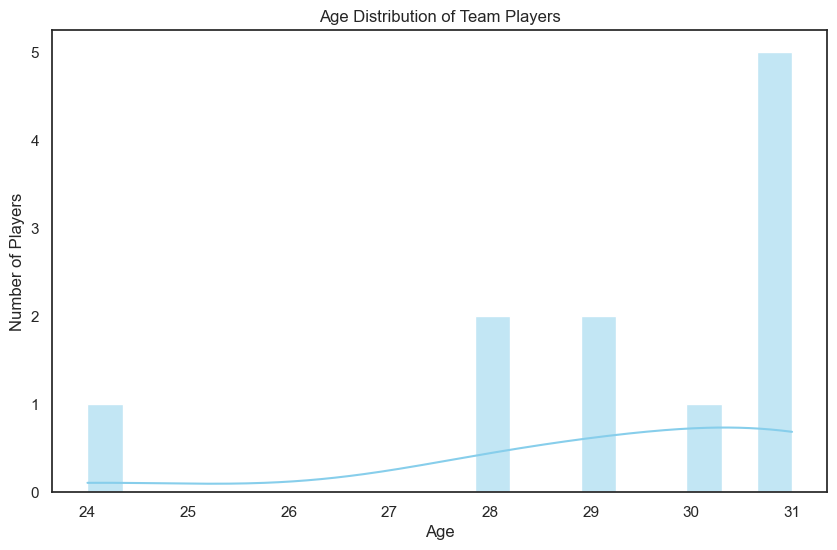

In [31]:
sns.set(style="white") # we can use this one if we want grids: sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(data=team, x='Age', bins=20, kde=True, color='skyblue')  # kde - for the line
plt.title('Age Distribution of Team Players')
plt.xlabel('Age')
plt.ylabel('Number of Players')
plt.show()

## 3.2 How does it compare with the rest of the Spanish teams?

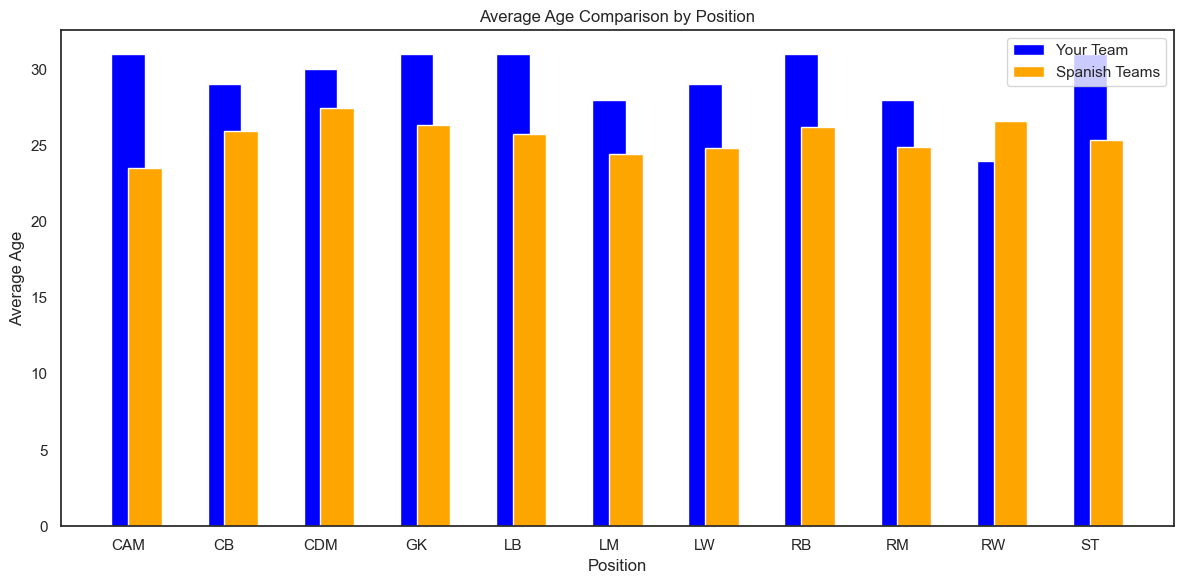

In [32]:
# Spanish teams (using our industry knowledge)
spanish_teams = ['FC Barcelona', 'SD Ponferradina', 'RCD Espanyol',
                 'Deportivo de La Coruña', 'Málaga CF', 'UD Las Palmas', 'Real Madrid',
                 'Real Betis', 'Villarreal CF', 'Rayo Vallecano', 'Athletic Club de Bilbao',
                 'Real Zaragoza', 'Girona FC', 'Cádiz CF', 'Real Sociedad', 'RCD Mallorca',
                 'Real Valladolid CF', 'CD Leganés', 'Extremadura UD', 'Gimnàstic de Tarragona',
                 'Hércules CF', 'Elche CF', 'FC Cartagena', 'Albacete BP', 'Racing Santander',
                 'CD Tenerife', 'Getafe CF', 'CD Mirandés', 'SD Huesca', 'Real Sporting de Gijón',
                 'Sevilla FC', 'Granada CF', 'Atlético Madrid', 'CA Osasuna', 'CF Fuenlabrada',
                 'AD Alcorcón', 'RC Celta', 'SD Eibar', 'CD Lugo', 'Real Oviedo', 'Valencia CF',
                 'CE Sabadell FC', 'UD Logroñés', 'UD Almería', 'CD Numancia', 'Deportivo Alavés',
                 'Levante UD', 'C.D. Castellón', 'UE Llagostera', 'CF Rayo Majadahonda', 'UCAM Murcia CF',
                 'Córdoba CF', 'Zamora FC', 'FC Barcelona B']

# what I am looking for - club
spanish_teams_data = fifa[fifa['Club'].isin(spanish_teams)]

# avg of each postiion
average_age_by_position_spanish = spanish_teams_data.groupby('BP')['Age'].mean().reset_index()

# Filter team data - order
positions_needed = ['GK', 'LB', 'CB', 'RB', 'CDM', 'LM', 'RM', 'CAM', 'LW', 'ST', 'RW']
team_data = team[team['BP'].isin(positions_needed)]

# avg on our team
average_age_by_position_team = team_data.groupby('BP')['Age'].mean().reset_index()

# Merge
combined_average_age = pd.merge(average_age_by_position_team, average_age_by_position_spanish, on='BP', suffixes=('_Team', '_Spanish'))

# 2 column chart
plt.figure(figsize=(12, 6))
positions = combined_average_age['BP']

# width
bar_width = 0.35

# 2 bars, side by side...
plt.bar(positions, combined_average_age['Age_Team'], width=bar_width, label='Your Team', color='blue', align='center')
plt.bar(positions, combined_average_age['Age_Spanish'], width=bar_width, label='Spanish Teams', color='orange', align='edge')

plt.title('Average Age Comparison by Position')
plt.xlabel('Position')
plt.ylabel('Average Age')
plt.legend()

plt.tight_layout()
plt.show()

## 3.3 How does our OVA, for each position, look like against the average team in our data frame?

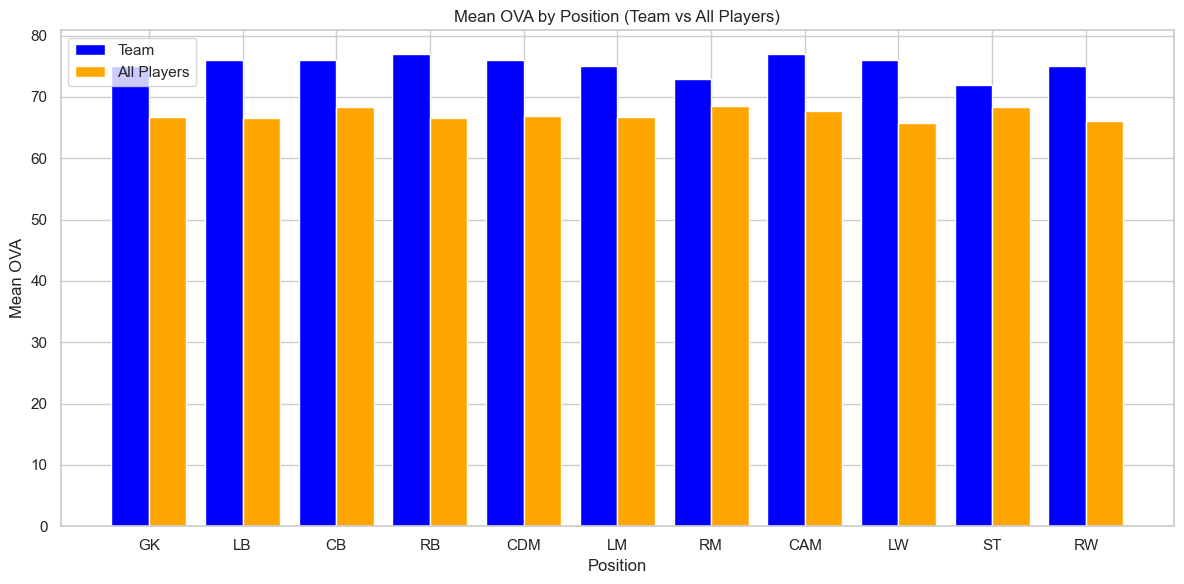

In [33]:
sns.set(style="whitegrid")

# positions
positions_needed = ['GK', 'LB', 'CB', 'RB', 'CDM', 'LM', 'RM', 'CAM', 'LW', 'ST', 'RW']

# our team
team_filtered = team[team['BP'].isin(positions_needed)]

# the rest
fifa_filtered = fifa[fifa['BP'].isin(positions_needed)]

# subplot - 2 columns
fig, ax = plt.subplots(figsize=(12, 6))

# width
bar_width = 0.4

# positions of the bars
positions_team = range(len(positions_needed))
positions_all_players = [pos + bar_width for pos in positions_team]

# OVA for our team - no error bars
ax.bar(positions_team, team_filtered.groupby('BP')['OVA'].mean(), width=bar_width, label='Team', color='blue')

# OVA for the whole data set - no error bars
ax.bar(positions_all_players, fifa_filtered.groupby('BP')['OVA'].mean(), width=bar_width, label='All Players', color='orange')

# Set positions for the x-axis ticks and labels
ax.set_xticks([pos + bar_width / 2 for pos in positions_team])
ax.set_xticklabels(positions_needed)

ax.set_title('Mean OVA by Position (Team vs All Players)')
ax.set_xlabel('Position')
ax.set_ylabel('Mean OVA')

# Show the plot
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


## 3.4 How does our OVA compare with the rest of the teams in our league?



In [34]:
# List of Spanish teams
spanish_teams = ['FC Barcelona', 'SD Ponferradina', 'RCD Espanyol',
                 'Deportivo de La Coruña', 'Málaga CF', 'UD Las Palmas', 'Real Madrid',
                 'Real Betis', 'Villarreal CF', 'Rayo Vallecano', 'Athletic Club de Bilbao',
                 'Real Zaragoza', 'Girona FC', 'Cádiz CF', 'Real Sociedad', 'RCD Mallorca',
                 'Real Valladolid CF', 'CD Leganés', 'Extremadura UD', 'Gimnàstic de Tarragona',
                 'Hércules CF', 'Elche CF', 'FC Cartagena', 'Albacete BP', 'Racing Santander',
                 'CD Tenerife', 'Getafe CF', 'CD Mirandés', 'SD Huesca', 'Real Sporting de Gijón',
                 'Sevilla FC', 'Granada CF', 'Atlético Madrid', 'CA Osasuna', 'CF Fuenlabrada',
                 'AD Alcorcón', 'RC Celta', 'SD Eibar', 'CD Lugo', 'Real Oviedo', 'Valencia CF',
                 'CE Sabadell FC', 'UD Logroñés', 'UD Almería', 'CD Numancia', 'Deportivo Alavés',
                 'Levante UD', 'C.D. Castellón', 'UE Llagostera', 'CF Rayo Majadahonda', 'UCAM Murcia CF',
                 'Córdoba CF', 'Zamora FC', 'FC Barcelona B']

In [35]:
# Positions
positions_needed = ['GK', 'LB', 'CB', 'RB', 'CDM', 'LM', 'RM', 'CAM', 'LW', 'ST', 'RW']

# Filtering by positions - our team
your_team_data = team[team['BP'].isin(positions_needed)]

# Filtering by positions - Spanish teams
spanish_team_data = data[(data['Club'].isin(spanish_teams)) & (data['BP'].isin(positions_needed))]


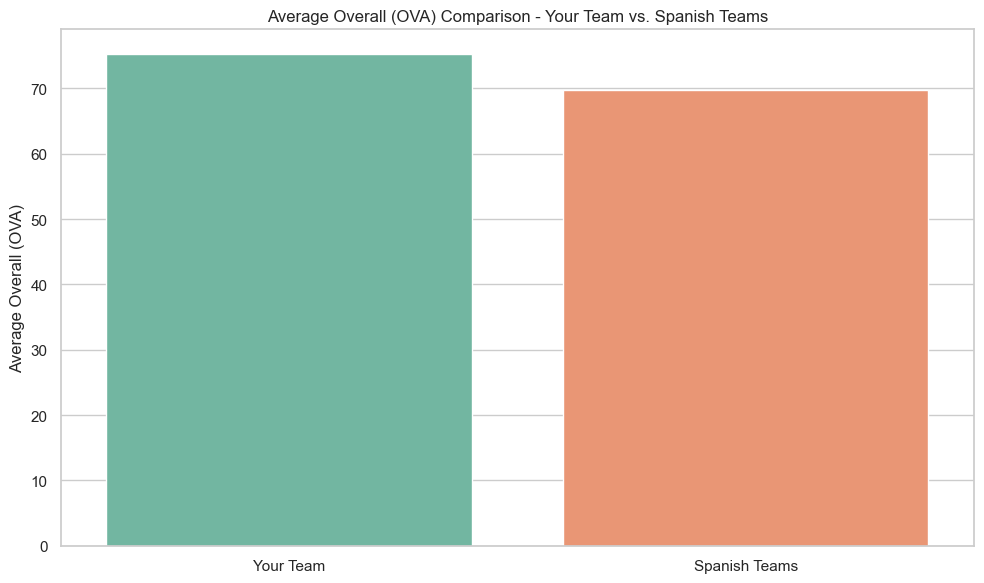

In [36]:
# Average OVA for our team and Spanish teams
your_team_average_ova = your_team_data['OVA'].mean()
spanish_teams_average_ova = spanish_team_data['OVA'].mean()

# Bar plots
plt.figure(figsize=(10, 6))
sns.barplot(x=['Your Team', 'Spanish Teams'], y=[your_team_average_ova, spanish_teams_average_ova], palette='Set2')
plt.title('Average Overall (OVA) Comparison - Your Team vs. Spanish Teams')
plt.ylabel('Average Overall (OVA)')

plt.tight_layout()
plt.show()

## 3.5 How does our OVA, per position, compare with the rest of the spanish teams?

In [37]:
# List of Spanish teams
spanish_teams = ['FC Barcelona', 'SD Ponferradina', 'RCD Espanyol',
                 'Deportivo de La Coruña', 'Málaga CF', 'UD Las Palmas', 'Real Madrid',
                 'Real Betis', 'Villarreal CF', 'Rayo Vallecano', 'Athletic Club de Bilbao',
                 'Real Zaragoza', 'Girona FC', 'Cádiz CF', 'Real Sociedad', 'RCD Mallorca',
                 'Real Valladolid CF', 'CD Leganés', 'Extremadura UD', 'Gimnàstic de Tarragona',
                 'Hércules CF', 'Elche CF', 'FC Cartagena', 'Albacete BP', 'Racing Santander',
                 'CD Tenerife', 'Getafe CF', 'CD Mirandés', 'SD Huesca', 'Real Sporting de Gijón',
                 'Sevilla FC', 'Granada CF', 'Atlético Madrid', 'CA Osasuna', 'CF Fuenlabrada',
                 'AD Alcorcón', 'RC Celta', 'SD Eibar', 'CD Lugo', 'Real Oviedo', 'Valencia CF',
                 'CE Sabadell FC', 'UD Logroñés', 'UD Almería', 'CD Numancia', 'Deportivo Alavés',
                 'Levante UD', 'C.D. Castellón', 'UE Llagostera', 'CF Rayo Majadahonda', 'UCAM Murcia CF',
                 'Córdoba CF', 'Zamora FC', 'FC Barcelona B']

# Our team
positions_needed = ['GK', 'LB', 'CB', 'RB', 'CDM', 'LM', 'RM', 'CAM', 'LW', 'ST', 'RW']

# Store the averages of the OVA of both sets
your_team_ova_avg = []
spanish_teams_ova_avg = []

In [38]:
# Average OVA ratings for each position
for position in positions_needed:
    your_team_avg = your_team_data[your_team_data['BP'] == position]['OVA'].mean()
    spanish_teams_avg = spanish_team_data[spanish_team_data['BP'] == position]['OVA'].mean()
    your_team_ova_avg.append(your_team_avg)
    spanish_teams_ova_avg.append(spanish_teams_avg)

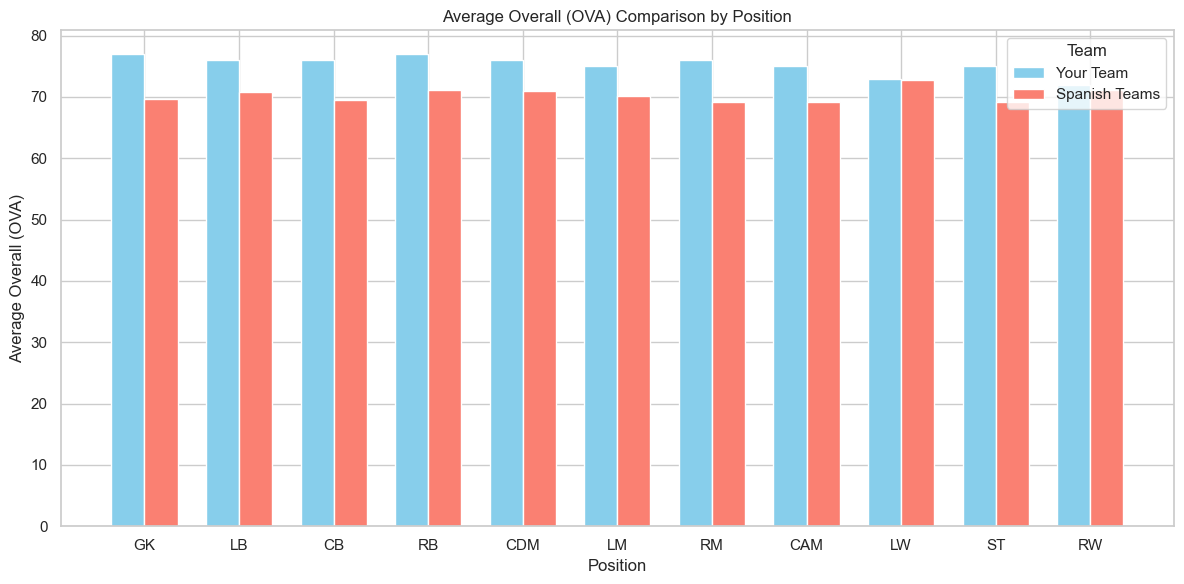

In [39]:
# Bar plots
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(positions_needed))
plt.bar(index, your_team_ova_avg, bar_width, label='Your Team', color='skyblue')
plt.bar([i + bar_width for i in index], spanish_teams_ova_avg, bar_width, label='Spanish Teams', color='salmon')
plt.title('Average Overall (OVA) Comparison by Position')
plt.xlabel('Position')
plt.ylabel('Average Overall (OVA)')
plt.xticks([i + bar_width/2 for i in index], positions_needed)
plt.legend(title='Team')

plt.tight_layout()
plt.show()

## 3.6  Now we would like to compare the skills of our players, focusing on ['PAC', 'SHO', 'PAS', 'DRI', 'DEF', 'PHY'] versus the rest of the Spanish teams.

In [40]:
# Skill
skill = 'PAC'

In [41]:
# Data frame with skill PAC for our team
team_skill_mean = team_filtered.groupby('BP')[skill].mean().reset_index()

# Data frame with skill PAC for Spanish teams
spanish_teams_skill_mean = spanish_teams_data.groupby('BP')[skill].mean().reset_index()

In [42]:
# Merge - combine
combined_skill_data = pd.merge(team_skill_mean, spanish_teams_skill_mean, on='BP', suffixes=('_Team', '_Spanish'))

# Positions and width
positions = combined_skill_data['BP']
bar_width = 0.35
x = range(len(positions))

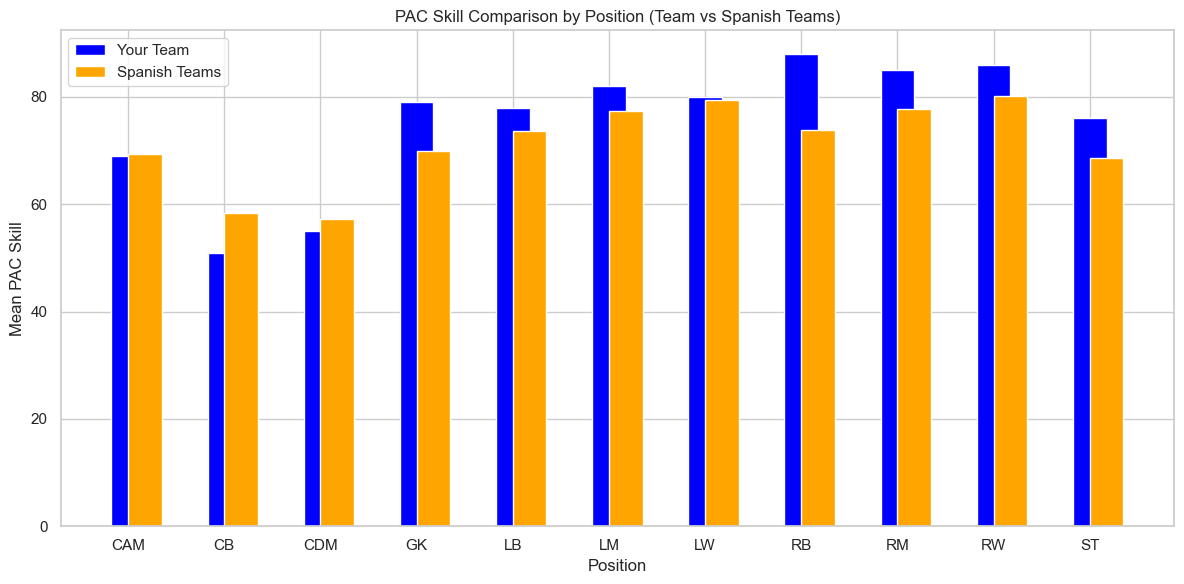

In [43]:
# Plot
plt.figure(figsize=(12, 6))
plt.bar(x, combined_skill_data['PAC_Team'], bar_width, label='Your Team', color='blue', align='center')
plt.bar(x, combined_skill_data['PAC_Spanish'], bar_width, label='Spanish Teams', color='orange', align='edge')

plt.title('PAC Skill Comparison by Position (Team vs Spanish Teams)')
plt.xlabel('Position')
plt.ylabel('Mean PAC Skill')
plt.xticks(x, positions)
plt.legend()

plt.tight_layout()
plt.show()

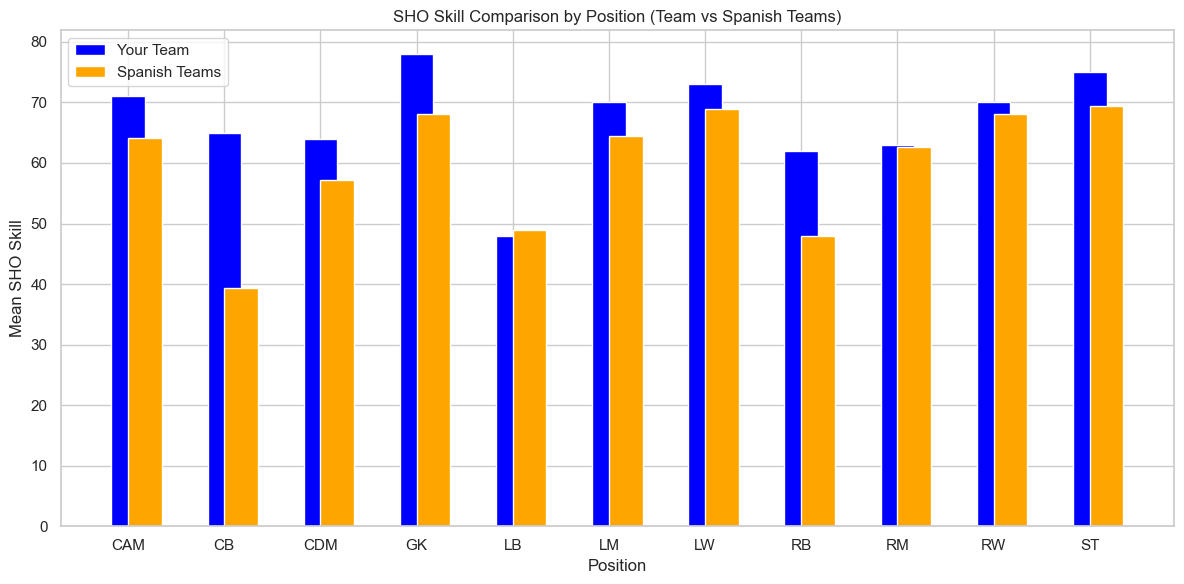

In [44]:
skill = 'SHO'

team_skill_mean = team_filtered.groupby('BP')[skill].mean().reset_index()

spanish_teams_skill_mean = spanish_teams_data.groupby('BP')[skill].mean().reset_index()

combined_skill_data = pd.merge(team_skill_mean, spanish_teams_skill_mean, on='BP', suffixes=('_Team', '_Spanish'))

positions = combined_skill_data['BP']
bar_width = 0.35
x = range(len(positions))

plt.figure(figsize=(12, 6))
plt.bar(x, combined_skill_data['SHO_Team'], bar_width, label='Your Team', color='blue', align='center')
plt.bar(x, combined_skill_data['SHO_Spanish'], bar_width, label='Spanish Teams', color='orange', align='edge')

plt.title('SHO Skill Comparison by Position (Team vs Spanish Teams)')
plt.xlabel('Position')
plt.ylabel('Mean SHO Skill')
plt.xticks(x, positions)
plt.legend()

plt.tight_layout()
plt.show()


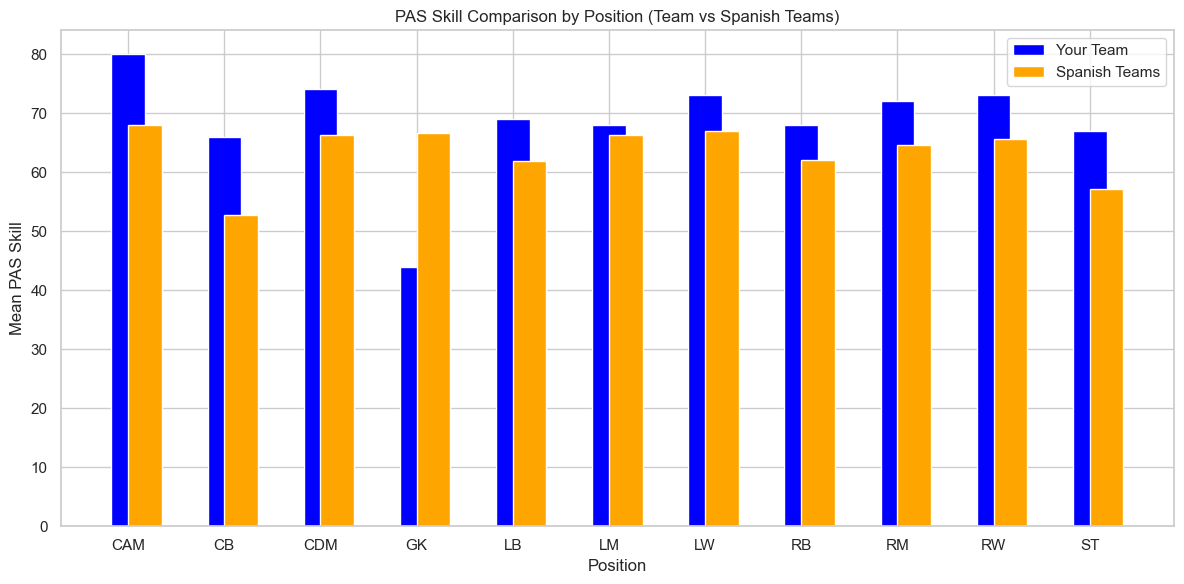

In [45]:
skill = 'PAS'

team_skill_mean = team_filtered.groupby('BP')[skill].mean().reset_index()

spanish_teams_skill_mean = spanish_teams_data.groupby('BP')[skill].mean().reset_index()

combined_skill_data = pd.merge(team_skill_mean, spanish_teams_skill_mean, on='BP', suffixes=('_Team', '_Spanish'))

positions = combined_skill_data['BP']
bar_width = 0.35
x = range(len(positions))

plt.figure(figsize=(12, 6))
plt.bar(x, combined_skill_data['PAS_Team'], bar_width, label='Your Team', color='blue', align='center')
plt.bar(x, combined_skill_data['PAS_Spanish'], bar_width, label='Spanish Teams', color='orange', align='edge')

plt.title('PAS Skill Comparison by Position (Team vs Spanish Teams)')
plt.xlabel('Position')
plt.ylabel('Mean PAS Skill')
plt.xticks(x, positions)
plt.legend()

plt.tight_layout()
plt.show()


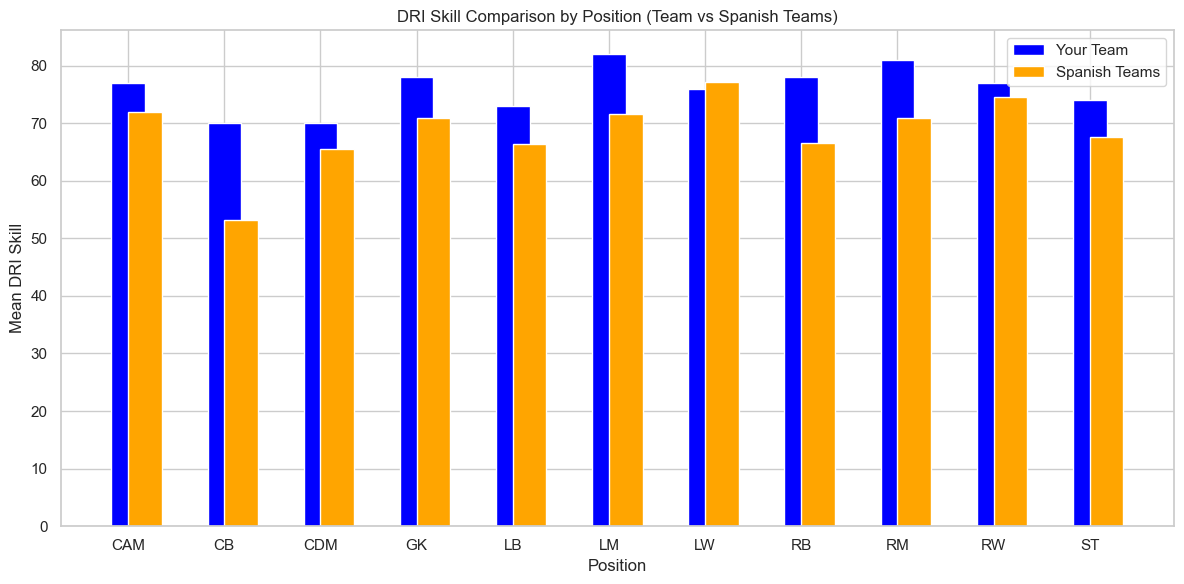

In [46]:
skill = 'DRI'

team_skill_mean = team_filtered.groupby('BP')[skill].mean().reset_index()

spanish_teams_skill_mean = spanish_teams_data.groupby('BP')[skill].mean().reset_index()

combined_skill_data = pd.merge(team_skill_mean, spanish_teams_skill_mean, on='BP', suffixes=('_Team', '_Spanish'))

positions = combined_skill_data['BP']
bar_width = 0.35
x = range(len(positions))

plt.figure(figsize=(12, 6))
plt.bar(x, combined_skill_data['DRI_Team'], bar_width, label='Your Team', color='blue', align='center')
plt.bar(x, combined_skill_data['DRI_Spanish'], bar_width, label='Spanish Teams', color='orange', align='edge')

plt.title('DRI Skill Comparison by Position (Team vs Spanish Teams)')
plt.xlabel('Position')
plt.ylabel('Mean DRI Skill')
plt.xticks(x, positions)
plt.legend()

plt.tight_layout()
plt.show()


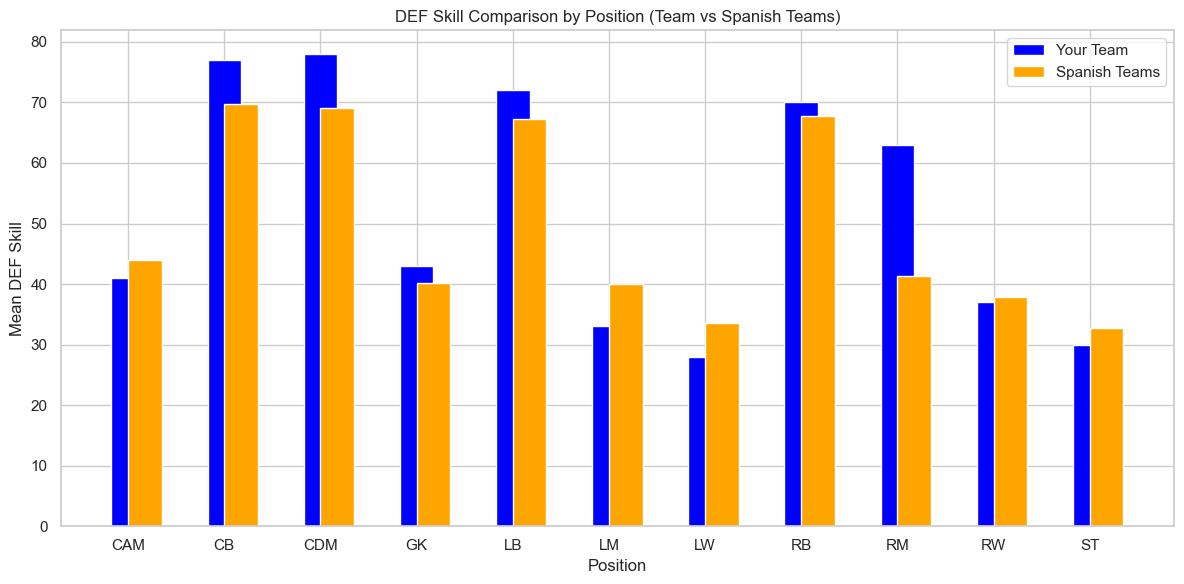

In [47]:
skill = 'DEF'

team_skill_mean = team_filtered.groupby('BP')[skill].mean().reset_index()

spanish_teams_skill_mean = spanish_teams_data.groupby('BP')[skill].mean().reset_index()

combined_skill_data = pd.merge(team_skill_mean, spanish_teams_skill_mean, on='BP', suffixes=('_Team', '_Spanish'))

positions = combined_skill_data['BP']
bar_width = 0.35
x = range(len(positions))

plt.figure(figsize=(12, 6))
plt.bar(x, combined_skill_data['DEF_Team'], bar_width, label='Your Team', color='blue', align='center')
plt.bar(x, combined_skill_data['DEF_Spanish'], bar_width, label='Spanish Teams', color='orange', align='edge')

plt.title('DEF Skill Comparison by Position (Team vs Spanish Teams)')
plt.xlabel('Position')
plt.ylabel('Mean DEF Skill')
plt.xticks(x, positions)
plt.legend()

plt.tight_layout()
plt.show()


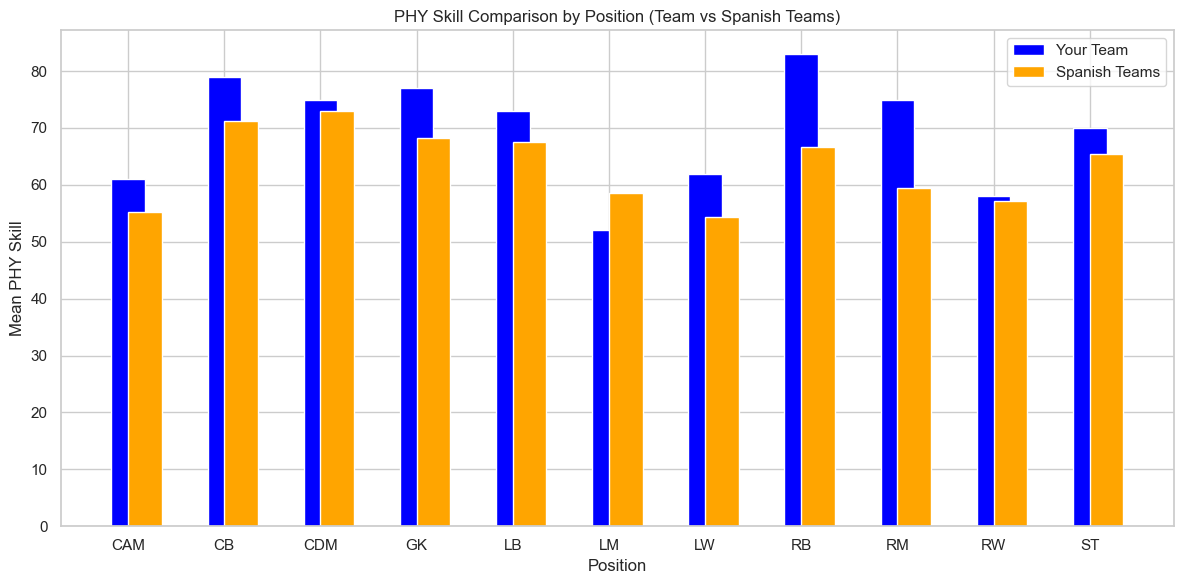

In [48]:
skill = 'PHY'

team_skill_mean = team_filtered.groupby('BP')[skill].mean().reset_index()

spanish_teams_skill_mean = spanish_teams_data.groupby('BP')[skill].mean().reset_index()

combined_skill_data = pd.merge(team_skill_mean, spanish_teams_skill_mean, on='BP', suffixes=('_Team', '_Spanish'))

positions = combined_skill_data['BP']
bar_width = 0.35
x = range(len(positions))

plt.figure(figsize=(12, 6))
plt.bar(x, combined_skill_data['PHY_Team'], bar_width, label='Your Team', color='blue', align='center')
plt.bar(x, combined_skill_data['PHY_Spanish'], bar_width, label='Spanish Teams', color='orange', align='edge')

plt.title('PHY Skill Comparison by Position (Team vs Spanish Teams)')
plt.xlabel('Position')
plt.ylabel('Mean PHY Skill')
plt.xticks(x, positions)
plt.legend()

plt.tight_layout()
plt.show()
